In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pandas as pd
import glob
inhalt = []

In [3]:
for name in glob.glob('H:/Messdaten_max/messdaten_*.xlsx'):
    inhalt.append(name)

In [4]:
a = len(inhalt) - 2
path = 'H:/Messdaten_max/messdaten_'
df = pd.DataFrame()

In [5]:
b = []
for i in range(a):
    file = path+str(i + 1)+'.xlsx'
    
    if i == 0:
        df = pd.read_excel(file)
        values = df.values
        b.append(values)
    
    else:
        df = pd.read_excel(file)
        values = df.values
        b.append(values)

In [6]:
signal0 = []
for i in range(a):
    signal0.append(b[i][: ,0])

In [50]:
from scipy.fftpack import fft

def make_fft(signal):
    N = signal.shape[0]

    # Sample spacing
    T = 1.0 / 20000.0

    x = np.linspace(0.0, N*T, N)
    yf = fft(signal)
    yf = np.abs(yf[0:int(N/2.0)])
    xf = np.linspace(0.0, 1.0/(2.0 * T), int(N/2))
    return xf, yf

In [51]:
list_xf = []
list_yf = []

for i in range(a):
    xf, yf = make_fft(signal0[i])
    list_xf.append(xf)
    list_yf.append(yf)

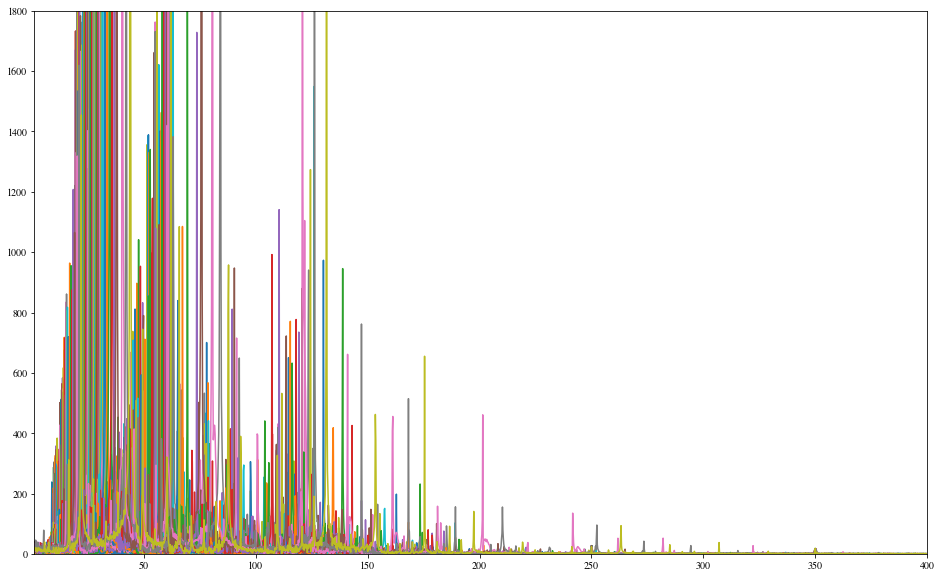

In [68]:
time = np.linspace(0,5,100000)
plt.figure(figsize=(16,10))
for i in range(a):
    
    plt.plot(list_xf[i],list_yf[i])
    plt.xlim(1,400)
    plt.ylim(0,1800)
plt.show()

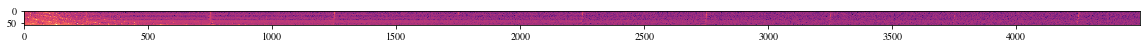

In [63]:
yf = []
xf = []
for i in range(a):
    yf.append(list_yf[i][500:5000])
    xf.append(list_xf[i][500:5000])
plt.figure(figsize=(20,6))
plt.imshow(np.log(yf),cmap='magma')
plt.show()

In [72]:
import scipy as sc
import scipy.ndimage
import matplotlib
def plot_waterfall_complete(amplitude, frequency, path, rpm, title):
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    plt.figure(figsize=(16, 12))
    #for i in range(amplitude.shape[0]):
    #    amplitude[i, :] = amplitude[i, :]/np.max(amplitude[i, :])
    #drehzahlachse = np.arange(min(rpm), max(rpm), max(rpm)/rpm.shape)
    drehzahlachse = rpm
    freqachse = frequency[0][:]

    (x, y) = np.meshgrid(frequency[0][:], rpm)#cutted_freq.shape[1])
    amplitude = scipy.ndimage.gaussian_filter(amplitude, sigma=3)
    c = plt.pcolormesh(x, y, amplitude, cmap='inferno')
    plt.axis([freqachse.min(), freqachse.max(), rpm.min(), rpm.max()])
    plt.tick_params(axis='x', labelsize='16')
    plt.tick_params(axis='y', labelsize='16')
    clb = plt.colorbar(c)
    clb.set_label('Normierte Amplitude', fontsize = 20)
    plt.ylabel('Drehzahl in U/min', fontsize = 20)
    plt.xlabel('Frequenz in Hz', fontsize = 20)
    #plt.title(title, fontsize = 18)
    #plt.savefig(savepath+title+".png", dpi = 800)
    plt.show()
    plt.close()

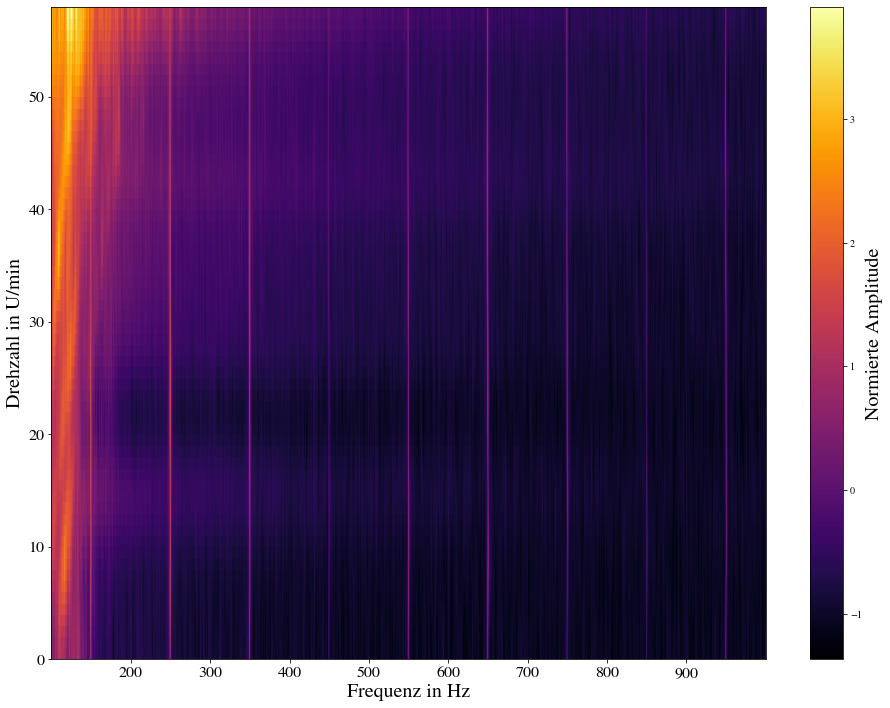

In [73]:
plot_waterfall_complete(np.log(yf), xf, 'a', np.arange(0,59), 'titel')

In [66]:
1250/3.81 /60 * 4

21.872265966754153

(0.8, 10)

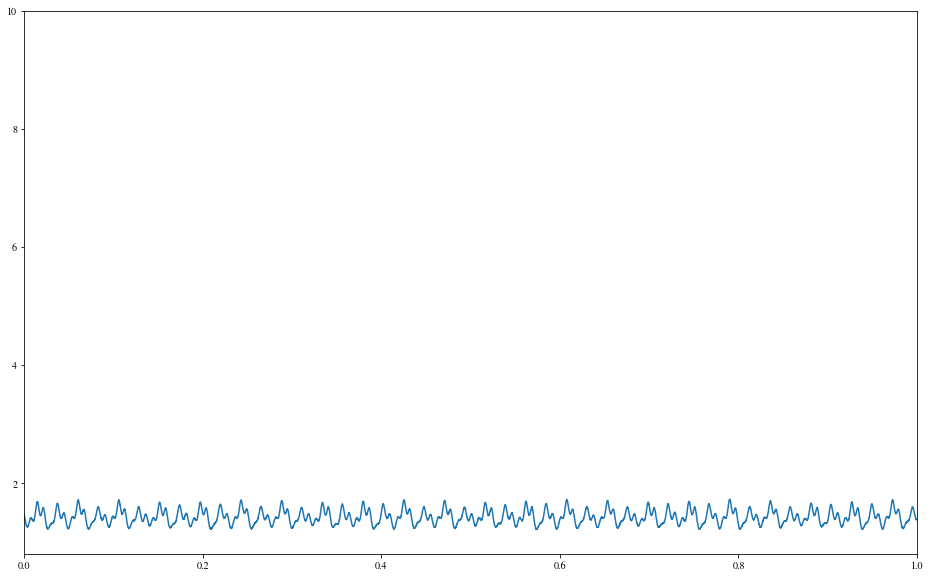

In [69]:
plt.figure(figsize=(16,10))
plt.plot(time,signal0[-1])
plt.xlim(0, 1)
plt.ylim(0.8,10)